## Load the data from a CSV file

In [11]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 5]

import time

start = time.time()

earthquake = []
with open('earthquake.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        earthquake.append(row)
        print(', '.join(row))
        
print(time.time()-start)

# dataset: GeoCSV 2.0, 
# delimiter: , 
# SID: II_PFO_00_BH1, 
# sample_count: 2400, 
# sample_rate_hz: 20, 
# start_time: 2018-09-22T08:19:19.019538Z, 
# field_unit: UTC,  Counts
# field_type: datetime,  INTEGER
Time,  Sample
2018-09-22T08:19:19.019538Z, 368
2018-09-22T08:19:19.069538Z, 359
2018-09-22T08:19:19.119538Z, 346
2018-09-22T08:19:19.169538Z, 251
2018-09-22T08:19:19.219538Z, 218
2018-09-22T08:19:19.269538Z, 149
2018-09-22T08:19:19.319538Z, 128
2018-09-22T08:19:19.369538Z, 121
2018-09-22T08:19:19.419538Z, 57
2018-09-22T08:19:19.469538Z, 65
2018-09-22T08:19:19.519538Z, 18
2018-09-22T08:19:19.569538Z, -4
2018-09-22T08:19:19.619538Z, 0
2018-09-22T08:19:19.669538Z, -30
2018-09-22T08:19:19.719538Z, -53
2018-09-22T08:19:19.769538Z, -61
2018-09-22T08:19:19.819538Z, -39
2018-09-22T08:19:19.869538Z, -64
2018-09-22T08:19:19.919538Z, -63
2018-09-22T08:19:19.969538Z, -95
2018-09-22T08:19:20.019538Z, -132
2018-09-22T08:19:20.069538Z, -100
2018-09-22T08:19:20.119538Z, -90
2018-09-22T08:19:2

2018-09-22T08:20:33.369538Z, -113
2018-09-22T08:20:33.419538Z, -100
2018-09-22T08:20:33.469538Z, -169
2018-09-22T08:20:33.519538Z, -238
2018-09-22T08:20:33.569538Z, -217
2018-09-22T08:20:33.619538Z, -192
2018-09-22T08:20:33.669538Z, -177
2018-09-22T08:20:33.719538Z, -286
2018-09-22T08:20:33.769538Z, -314
2018-09-22T08:20:33.819538Z, -246
2018-09-22T08:20:33.869538Z, -278
2018-09-22T08:20:33.919538Z, -309
2018-09-22T08:20:33.969538Z, -327
2018-09-22T08:20:34.019538Z, -349
2018-09-22T08:20:34.069538Z, -311
2018-09-22T08:20:34.119538Z, -306
2018-09-22T08:20:34.169538Z, -324
2018-09-22T08:20:34.219538Z, -322
2018-09-22T08:20:34.269538Z, -345
2018-09-22T08:20:34.319538Z, -311
2018-09-22T08:20:34.369538Z, -319
2018-09-22T08:20:34.419538Z, -306
2018-09-22T08:20:34.469538Z, -243
2018-09-22T08:20:34.519538Z, -262
2018-09-22T08:20:34.569538Z, -238
2018-09-22T08:20:34.619538Z, -238
2018-09-22T08:20:34.669538Z, -259
2018-09-22T08:20:34.719538Z, -215
2018-09-22T08:20:34.769538Z, -172
2018-09-22T08:

## Plot the loaded earthquake

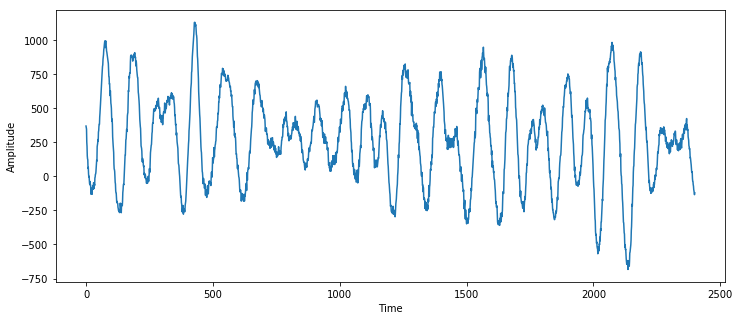

In [12]:
amplitude = [value[1] for value in earthquake[9:]]
amplitude = np.array(amplitude).astype('float')

plt.plot(amplitude)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

## Fit a spline to the earthquake

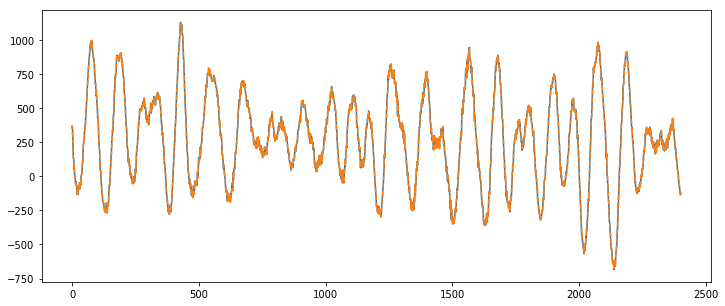

In [13]:
from scipy.interpolate import interp1d

x = np.linspace(0, len(amplitude), num=len(amplitude), endpoint=True)
y = amplitude
f = interp1d(x, y, kind='cubic')

xnew = np.linspace(0, len(amplitude), num=len(amplitude)*10, endpoint=True)

plt.plot(x, y, '-')
plt.plot(xnew, f(xnew), '--')
plt.show()

## Convert to steps

### Needs: 
Step size (radians)

Amplitude scale constant

The path must be able to be run without running out of steps, at first run the path slowly and then speed it up.

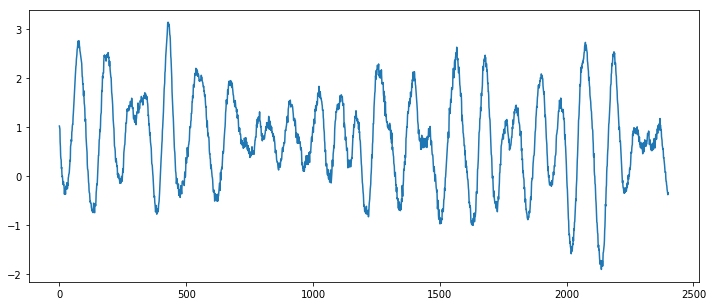

In [30]:
#amplitude scaling
stepSize = 2*np.pi/180/25
amplitude = 2*np.pi
amplitudeScaleConstant = 1/np.max(np.abs(y))*amplitude/2
yScaled = y*amplitudeScaleConstant

plt.plot(x,yScaled)

1


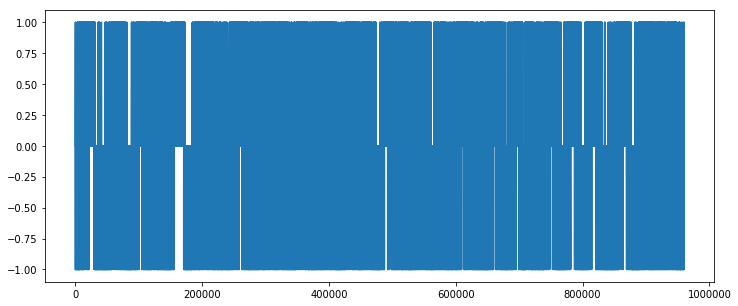

In [31]:
#speed scaling
stepDelay = 0.001 #seconds
maxVelocity = stepSize / stepDelay

f = interp1d(x, yScaled, kind='cubic')
xnew = np.linspace(0, len(yScaled), num=len(yScaled)*400, endpoint=True)
ynew = f(xnew)

#convert to steps
ynewSteps = (ynew / stepSize).astype(int)
yDelta = ynewSteps[1:] - ynewSteps[:-1]

print(np.max(np.abs(yDelta)))
plt.plot(yDelta)

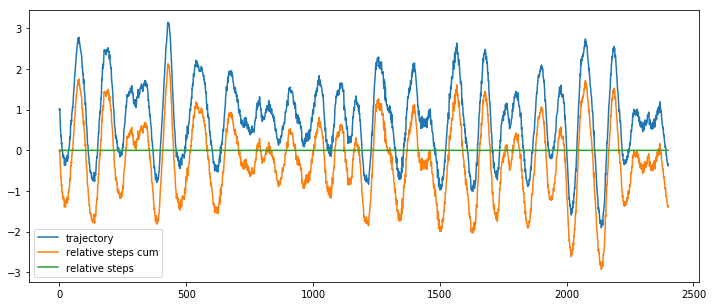

In [43]:
plt.figure()
plt.plot(xnew,ynew)
plt.plot(xnew[1:],np.cumsum(yDelta)*stepSize)
plt.plot(xnew[1:],yDelta*stepSize)
plt.legend(['trajectory', 'relative steps cum', 'relative steps'])
plt.show()

In [41]:
stepSize

0.0013962634015954637